In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from scipy.io import arff
from scipy.stats import pearsonr

In [2]:
data, meta = arff.loadarff('BreastCancer.arff')
df = pd.DataFrame(data)

for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')


df.to_csv('breastcancer.csv', index=False)


Load the data from .csv

In [3]:
data = pd.read_csv(r"E:\AISD\Term2\Advance ML\LAB\Lab1\Brestcancer_PCA\breastcancer.csv")

In [4]:
data

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,benign
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,benign
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,benign
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,benign
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,benign
...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,benign
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,benign
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,malignant
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,malignant


In [5]:
data.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,benign
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,benign
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,benign
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,benign
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,benign


In [6]:
data.isnull().sum()

Clump_Thickness           0
Cell_Size_Uniformity      0
Cell_Shape_Uniformity     0
Marginal_Adhesion         0
Single_Epi_Cell_Size      0
Bare_Nuclei              16
Bland_Chromatin           0
Normal_Nucleoli           0
Mitoses                   0
Class                     0
dtype: int64

In [7]:
data['Bare_Nuclei'] = data['Bare_Nuclei'].fillna(data['Bare_Nuclei'].mode()[0])

In [8]:
data.isnull().sum()

Clump_Thickness          0
Cell_Size_Uniformity     0
Cell_Shape_Uniformity    0
Marginal_Adhesion        0
Single_Epi_Cell_Size     0
Bare_Nuclei              0
Bland_Chromatin          0
Normal_Nucleoli          0
Mitoses                  0
Class                    0
dtype: int64

In [9]:
data.dtypes

Clump_Thickness          float64
Cell_Size_Uniformity     float64
Cell_Shape_Uniformity    float64
Marginal_Adhesion        float64
Single_Epi_Cell_Size     float64
Bare_Nuclei              float64
Bland_Chromatin          float64
Normal_Nucleoli          float64
Mitoses                  float64
Class                     object
dtype: object

Train Test split

In [10]:
y = data['Class']
X = data.drop('Class', axis=1)

In [11]:
X

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0


In [12]:
y

0         benign
1         benign
2         benign
3         benign
4         benign
         ...    
694       benign
695       benign
696    malignant
697    malignant
698    malignant
Name: Class, Length: 699, dtype: object

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)

In [14]:
X_train

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
91,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0
190,10.0,10.0,10.0,8.0,6.0,8.0,7.0,10.0,1.0
142,9.0,5.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0
397,4.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
591,2.0,5.0,7.0,6.0,4.0,10.0,7.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...
500,6.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
27,5.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
375,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
519,4.0,7.0,8.0,3.0,4.0,10.0,9.0,1.0,1.0


Standardization

In [15]:
scalar = StandardScaler()

In [16]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

Random forest


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")


In [18]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [19]:
rf = RandomForestClassifier(random_state=20)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=params, cv=5, n_iter=10, scoring='accuracy')
random_search.fit(X_train, y_train)


print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}


In [20]:
best_rf = random_search.best_estimator_
best_rf.fit(X_train,y_train)
y_pred = best_rf.predict(X_test)

In [21]:
conf_matrix = confusion_matrix(y_pred,y_test)
acc_rf = accuracy_score(y_pred,y_test)
print(conf_matrix)
print(acc_rf)

[[134   0]
 [  4  72]]
0.9809523809523809


Pearson Correlation

In [22]:
X.dtypes

Clump_Thickness          float64
Cell_Size_Uniformity     float64
Cell_Shape_Uniformity    float64
Marginal_Adhesion        float64
Single_Epi_Cell_Size     float64
Bare_Nuclei              float64
Bland_Chromatin          float64
Normal_Nucleoli          float64
Mitoses                  float64
dtype: object

In [23]:
y_numeric = pd.Series(pd.factorize(y)[0])

In [24]:
y_numeric

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Length: 699, dtype: int64

In [25]:
correlations = []
for i in range(X.shape[1]):
    corr, _ = pearsonr(X.iloc[:, i], y_numeric)
    correlations.append(abs(corr))


In [26]:
correlations

[np.float64(0.7160013621134171),
 np.float64(0.81790373530756),
 np.float64(0.818933739420526),
 np.float64(0.6968002062857465),
 np.float64(0.6827845300938662),
 np.float64(0.818967936961388),
 np.float64(0.7566161463789063),
 np.float64(0.7122436220251231),
 np.float64(0.42317025679524417)]

Sort the Correlation and take top 5 features


In [27]:
top5_indices = sorted(range(len(correlations)), key=lambda i: correlations[i], reverse=True)[:5]
X_top5 = X.iloc[:, top5_indices]

In [28]:
X_top5

,Bare_Nuclei,Cell_Shape_Uniformity,Cell_Size_Uniformity,Bland_Chromatin,Clump_Thickness
0,1.0,1.0,1.0,3.0,5.0
1,10.0,4.0,4.0,3.0,5.0
2,2.0,1.0,1.0,3.0,3.0
3,4.0,8.0,8.0,3.0,6.0
4,1.0,1.0,1.0,3.0,4.0
...,...,...,...,...,...
694,2.0,1.0,1.0,1.0,3.0
695,1.0,1.0,1.0,1.0,2.0
696,3.0,10.0,10.0,8.0,5.0
697,4.0,6.0,8.0,10.0,4.0


In [29]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_top5, y, test_size=0.3, random_state=20, stratify=y)


In [30]:
scalar

StandardScaler()

In [31]:
X_train1 = scalar.fit_transform(X_train1)
X_test1 = scalar.transform(X_test1)

In [32]:
X_train1

array([[-0.69669967, -0.73833514, -0.69216085, -1.01640093, -0.50042592],
       [ 1.26126664,  2.34752711,  2.26531478,  1.47284809,  1.96781315],
       [ 0.42213822,  0.63315919,  0.62227276,  0.22822358,  1.61520757],
       ...,
       [-0.69669967, -0.73833514, -0.69216085, -1.01640093, -1.20563708],
       [ 1.82068558,  1.66177994,  1.27948957,  2.30259776, -0.14782034],
       [ 1.82068558,  0.29028561,  0.29366436,  0.64309842,  0.20478525]],
      shape=(489, 5))

In [33]:
best_rf.fit(X_train1,y_train1)
y_pred = best_rf.predict(X_test1)

In [34]:
conf_matrix_pearson = confusion_matrix(y_pred,y_test1)
acc_reduced_features = accuracy_score(y_pred,y_test1)
print(conf_matrix_pearson)
print(acc_reduced_features)

[[134   3]
 [  4  69]]
0.9666666666666667


Apply PCA


In [35]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X_train)
pca.transform(X_test)


array([[ 1.91533721e+00, -1.23043526e+00, -6.82865357e-01, ...,
        -6.37473067e-02,  1.43725493e+00,  6.05659955e-01],
       [-1.00947819e+00,  2.10106873e-02,  2.22770759e-01, ...,
         2.03261261e-01, -4.55134233e-01, -2.30658971e-03],
       [ 1.46332029e+00, -7.94228904e-01,  1.43234411e+00, ...,
         5.79462469e-01,  1.89231940e-01,  3.38796745e-01],
       ...,
       [-2.02725724e+00,  2.04580783e-01, -5.51930402e-01, ...,
         1.43441211e-02,  1.07081813e-01,  3.06711288e-02],
       [-1.45430663e+00, -4.62416988e-02,  2.71018340e-01, ...,
        -2.49989972e-01, -1.71898687e-01,  1.57032553e-04],
       [ 3.41830175e+00, -6.28812939e-01, -2.59742465e+00, ...,
         9.99849683e-01, -6.95077197e-01, -5.48860043e-01]],
      shape=(210, 9))

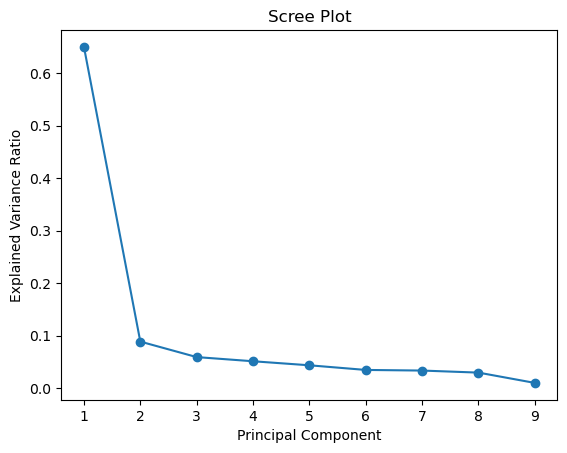

In [36]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

PCA with d = 4

In [37]:
pca_4 = PCA(n_components=4)
X_train_pca_4 = pca_4.fit_transform(X_train)
X_test_pca_4 = pca_4.transform(X_test)

In [38]:
print("explained variance is ", pca_4.explained_variance_ratio_)
print('Sum of variance is ', np.sum(pca_4.explained_variance_ratio_))

explained variance is  [0.65013219 0.08863149 0.05911171 0.0511707 ]
Sum of variance is  0.8490460925748244


In [45]:
rf_pca = RandomForestClassifier(random_state=20, n_estimators=100, min_samples_split = 2, min_samples_leaf = 4, max_depth = 10)
rf_pca.fit(X_train_pca_4, y_train)
y_pred_pca = rf_pca.predict(X_test_pca_4)

conf_matrix_pca_4 = confusion_matrix(y_test, y_pred_pca)
acc_pca_4 = accuracy_score(y_test, y_pred_pca)




In [54]:
print(f"Regular Confusion Matrix:\n{conf_matrix}")
print(f"Pearson Confusion Matrix:\n{conf_matrix_pearson}")
print(f"PCA Confusion Matrix:\n{conf_matrix_pca_4}")


Regular Confusion Matrix:
[[134   0]
 [  4  72]]
Pearson Confusion Matrix:
[[134   3]
 [  4  69]]
PCA Confusion Matrix:
[[134   4]
 [  0  72]]


In [47]:
y_train

91        benign
190    malignant
142    malignant
397       benign
591    malignant
         ...    
500       benign
27        benign
375       benign
519    malignant
38     malignant
Name: Class, Length: 489, dtype: object

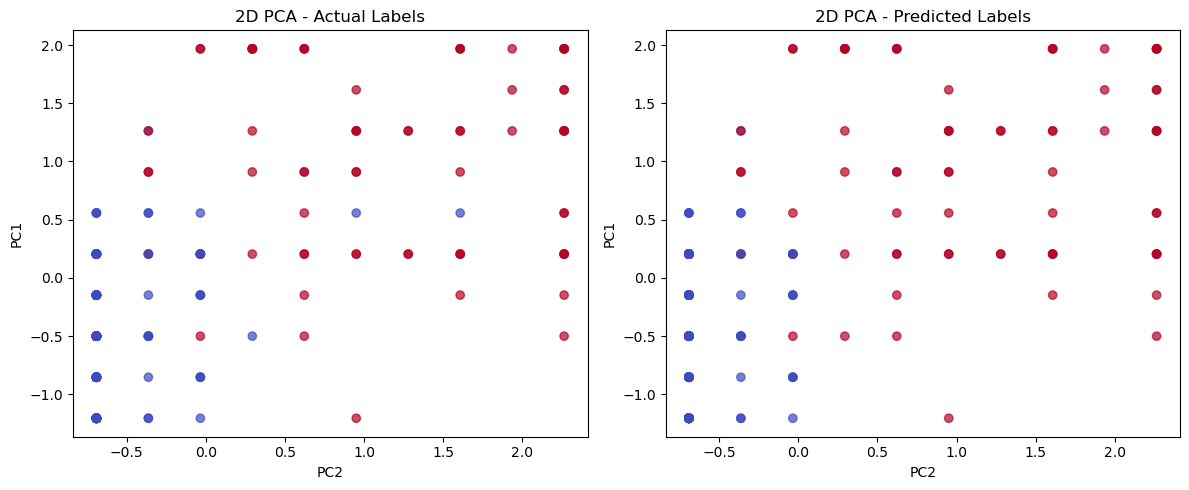

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred_pca)

plt.figure(figsize=(12, 5))

# Actual Labels
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 1], X_test[:, 0], c=y_test_encoded, cmap='coolwarm', alpha=0.7)
plt.title('2D PCA - Actual Labels')
plt.xlabel('PC2')
plt.ylabel('PC1')

# Predicted Labels
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 1], X_test[:, 0], c=y_pred_encoded, cmap='coolwarm', alpha=0.7)
plt.title('2D PCA - Predicted Labels')
plt.xlabel('PC2')
plt.ylabel('PC1')

plt.tight_layout()
plt.show()

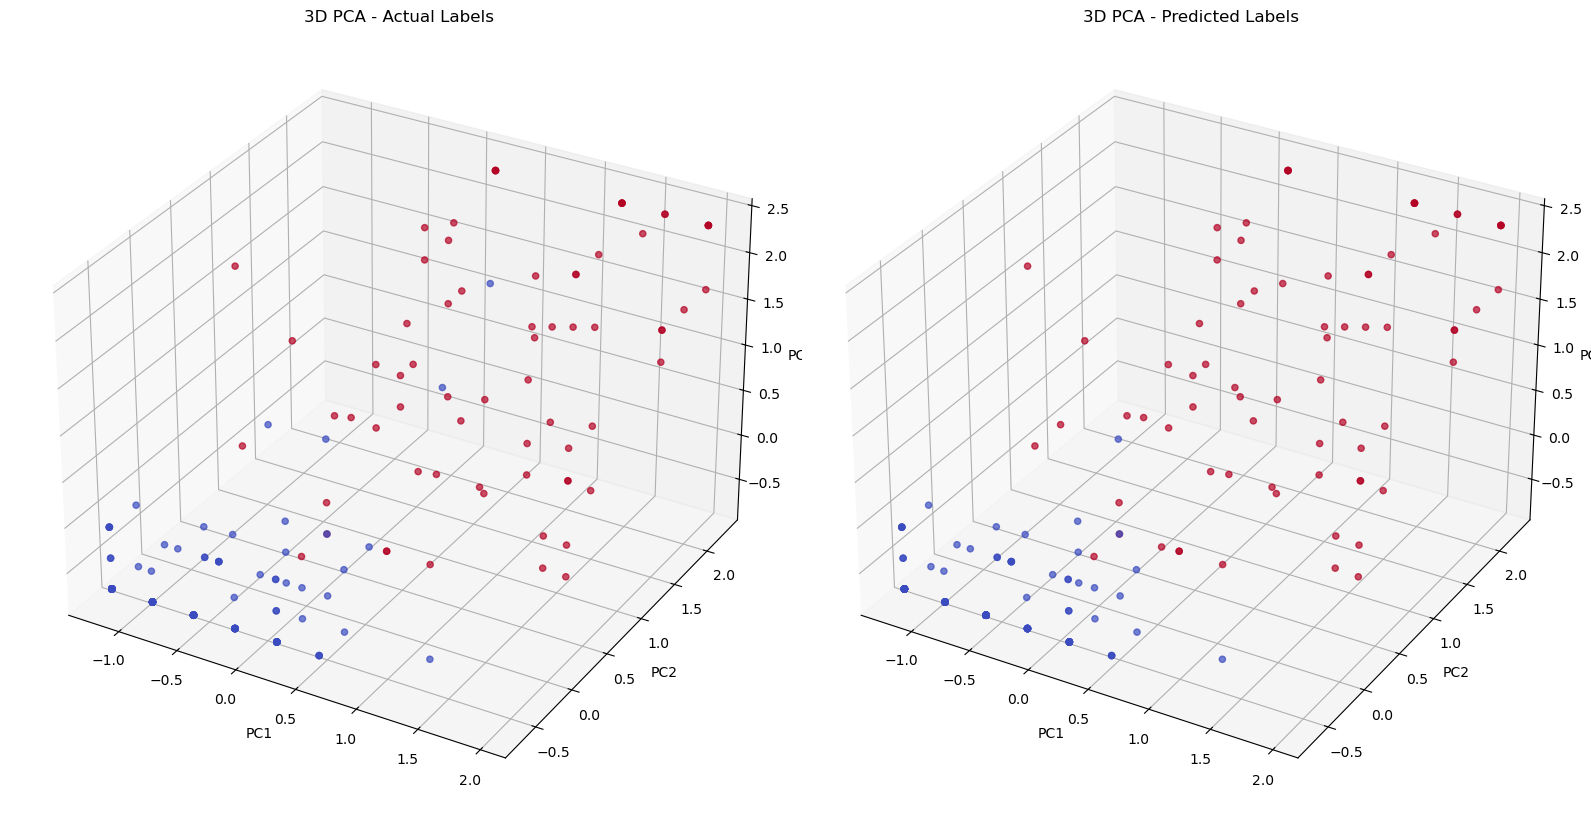

In [49]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 9))

# Actual Labels Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2],
            c=y_test_encoded, cmap='coolwarm', alpha=0.7)
ax1.set_title('3D PCA - Actual Labels')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# Predicted Labels Plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2],
            c=y_pred_encoded, cmap='coolwarm', alpha=0.7)
ax2.set_title('3D PCA - Predicted Labels')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

plt.tight_layout()
plt.show()

In [50]:
print(f"Accuracy of randomforest is ", acc_rf)
print(f"Accuracy of reduced features is ", acc_reduced_features)
print(f"Accuraacy of PCA with d=4 is ",acc_pca_4)

Accuracy of randomforest is  0.9809523809523809
Accuracy of reduced features is  0.9666666666666667
Accuraacy of PCA with d=4 is  0.9809523809523809
